<a href="https://colab.research.google.com/github/abigit240/NVIDIA_stock_analysis_and_prediction/blob/main/Fuel_consumption_vs_emission_analysis_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title 1. Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# @title 2. Get the dataset
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
import requests

def download(url, filename):
    """Downloads a file from a URL and saves it to a local file.

    Args:
        url (str): The URL of the file to download.
        filename (str): The name of the local file to save the downloaded file to.
    """
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

# Download the file
download(path, "FuelConsumption.csv")
path = "FuelConsumption.csv"

In [4]:
# @title 3. Explore dataset
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


from matplotlib import pyplot as plt
_df_0['ENGINESIZE'].plot(kind='hist', bins=20, title='ENGINESIZE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CYLINDERS'].plot(kind='hist', bins=20, title='CYLINDERS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FUELCONSUMPTION_COMB'].plot(kind='hist', bins=20, title='FUELCONSUMPTION_COMB')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CO2EMISSIONS'].plot(kind='hist', bins=20, title='CO2EMISSIONS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ENGINESIZE', y='CYLINDERS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CYLINDERS', y='FUELCONSUMPTION_COMB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CYLINDERS']
  ys = series['ENGINESIZE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('CYLINDERS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CYLINDERS')
_ = plt.ylabel('ENGINESIZE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CYLINDERS']
  ys = series['FUELCONSUMPTION_COMB']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('CYLINDERS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CYLINDERS')
_ = plt.ylabel('FUELCONSUMPTION_COMB')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CYLINDERS']
  ys = series['CO2EMISSIONS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('CYLINDERS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CYLINDERS')
_ = plt.ylabel('CO2EMISSIONS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CYLINDERS']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CYLINDERS'}, axis=1)
              .sort_values('CYLINDERS', ascending=True))
  xs = counted['CYLINDERS']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('CYLINDERS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CYLINDERS')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['ENGINESIZE'].plot(kind='line', figsize=(8, 4), title='ENGINESIZE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['CYLINDERS'].plot(kind='line', figsize=(8, 4), title='CYLINDERS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['FUELCONSUMPTION_COMB'].plot(kind='line', figsize=(8, 4), title='FUELCONSUMPTION_COMB')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['CO2EMISSIONS'].plot(kind='line', figsize=(8, 4), title='CO2EMISSIONS')
plt.gca().spines[['top', 'right']].set_visible(False)

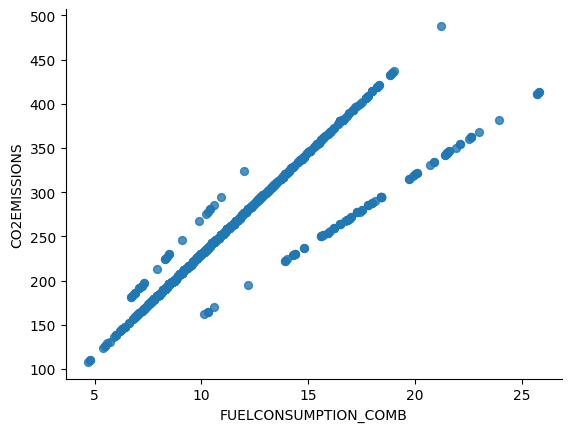

In [9]:
# @title FUELCONSUMPTION_COMB vs CO2EMISSIONS


cdf.plot(kind='scatter', x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

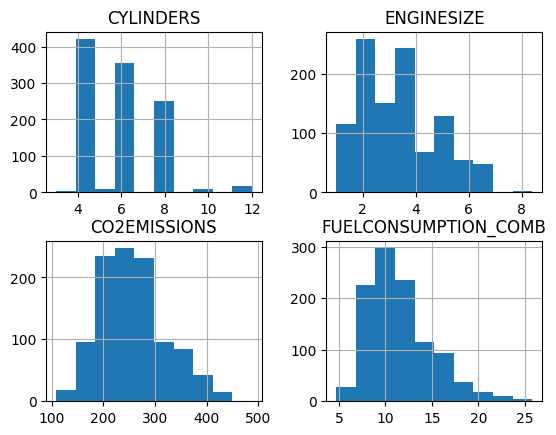

In [10]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

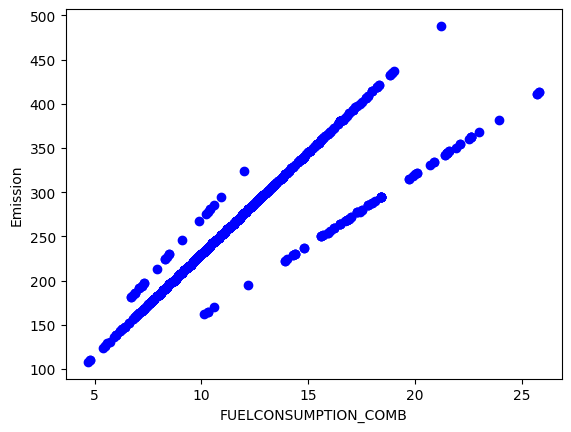

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

<Axes: xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

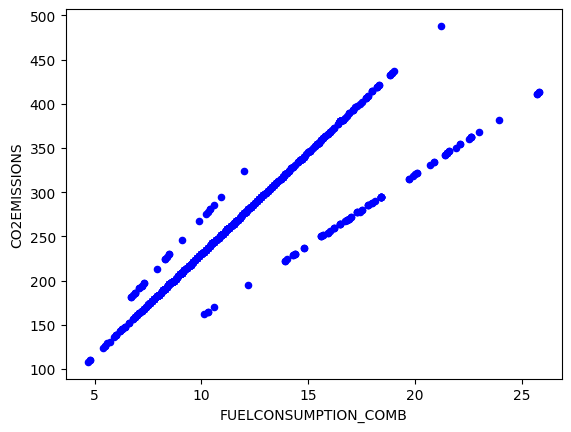

In [12]:
cdf.plot.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', color='blue')

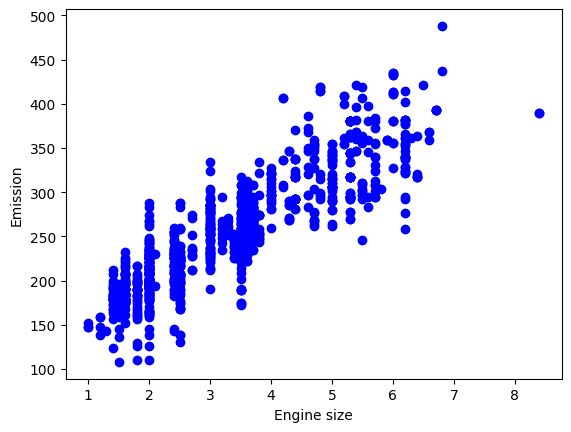

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

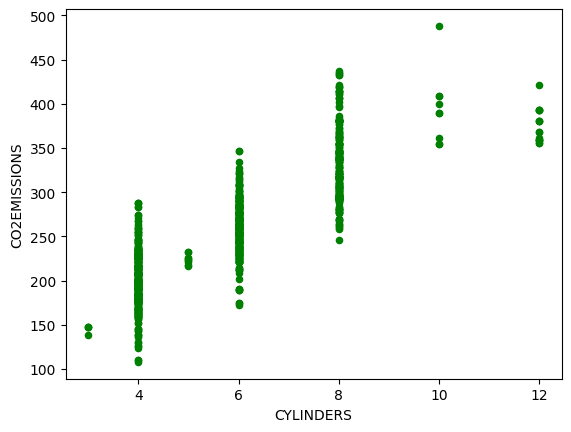

In [14]:
cdf.plot.scatter(x='CYLINDERS',y='CO2EMISSIONS',color='green')

In [15]:
# @title 4. Train-test split to apply linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Independent and dependent variables
X = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = cdf['CO2EMISSIONS']

# Feature scaling
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
#model = LinearRegression()
#model.fit(X_train, y_train)

# Predict on test data
#y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#print(f"Mean Squared Error (MSE): {mse}")
#print(f"R-squared (R2): {r2}")

In [16]:
#msk = np.random.rand(len(df)) < 0.8
#train = cdf[msk]
#test = cdf[~msk]

In [19]:
# @title Fit model
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['ENGINESIZE']])
train_y = np.asanyarray(y_train)
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [38.99297872]
Intercept:  126.28970217408721


Text(0, 0.5, 'Emission')

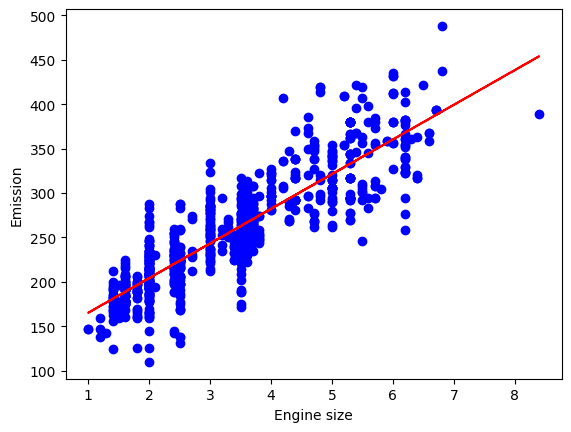

In [18]:
plt.scatter(X_train.ENGINESIZE, y_train,  color='blue')
plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_, '-r') # Changed this line
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [20]:
# @title Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(X_test[['ENGINESIZE']])
test_y = np.asanyarray(y_test)
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.10
Residual sum of squares (MSE): 985.94
R2-score: 0.76


In [25]:
# @title Try using Fuel consumption combined
train_x = np.asanyarray(X_train[['FUELCONSUMPTION_COMB']])

test_x = np.asanyarray(X_test[['FUELCONSUMPTION_COMB']])

In [27]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(y_train) #y_train has 1 column only so no need to mention
regr.fit(train_x, train_y)
#ADD CODE
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [16.18090078]
Intercept:  69.10302617988444


In [28]:
#test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
predictions = regr.predict(test_x)

In [29]:
test_y_=predictions
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_- test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.44
Residual sum of squares (MSE): 797.43
R2-score: 0.81


Text(0, 0.5, 'Emission')

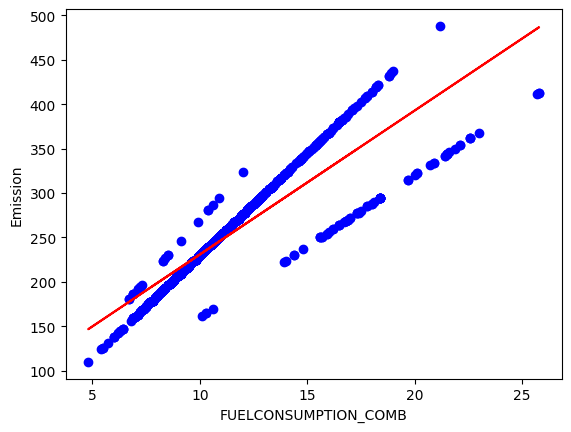

In [30]:
plt.scatter(X_train.FUELCONSUMPTION_COMB, y_train,  color='blue')
plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_, '-r') # Changed this line
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")